# The Sparks Foundation : Data Science & Business Analytics Intern 

# Task 3 : Exploratory Data Analysis - Retail

Level : Beginner

Author : Rafe Khan

Objective : 

 1. Perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
       
 2. As a business manager, try to find out the weak areas where you can work to make more profit
           
 3. What all business problems you can derive by exploring the data?

IDE : Jupyter Notebook  
       

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib_inline

In [2]:
df = pd.read_csv("SampleSuperstore.csv")
df.head(10)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
df.shape

(9994, 13)

In [5]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df.duplicated().sum()

17

In [7]:
df.drop_duplicates(subset=None,keep='first',inplace=True)
df.duplicated().sum()

0

In [8]:
df.select_dtypes(include=['object']).columns    # Categorical columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category'],
      dtype='object')

In [9]:
df.select_dtypes(exclude=['object']).columns     # Numerical columns

Index(['Postal Code', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')

In [10]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [11]:
df.drop('Postal Code',axis=1,inplace=True)

# Exploratory Data Analysis

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64


<BarContainer object of 4 artists>

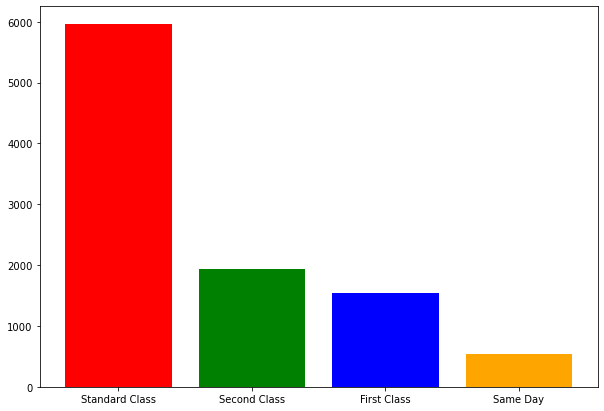

In [12]:
print(df['Ship Mode'].value_counts())
plt.figure(figsize=(10,7))
plt.bar(list(df['Ship Mode'].value_counts().keys()),list(df['Ship Mode'].value_counts()),color=['red','green','blue','orange'])

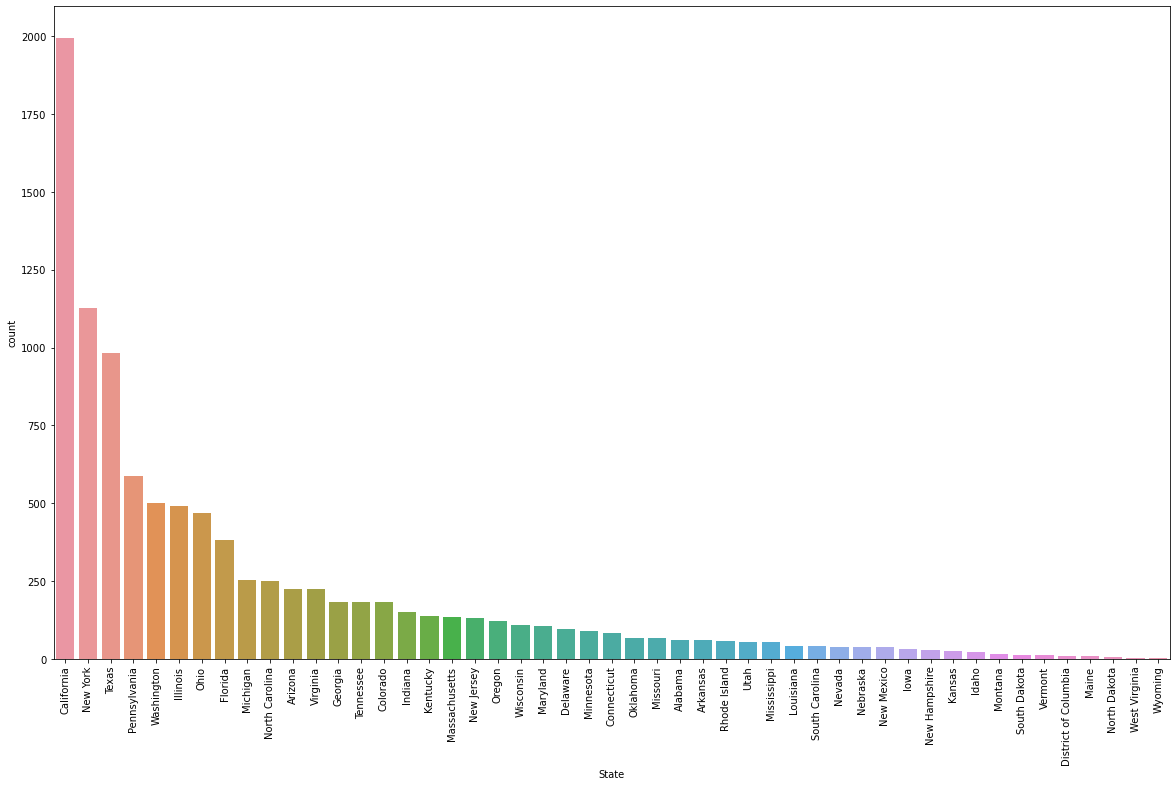

In [13]:
plt.figure(figsize=(20,12))
sns.countplot(x='State',data=df,order=df['State'].value_counts().index)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='Region'>

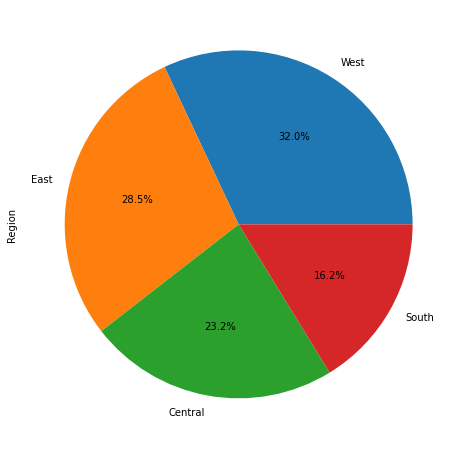

In [14]:
plt.figure(figsize=(10,8))
df['Region'].value_counts().plot.pie(autopct = '%1.1f%%')

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64


<AxesSubplot:xlabel='Category', ylabel='count'>

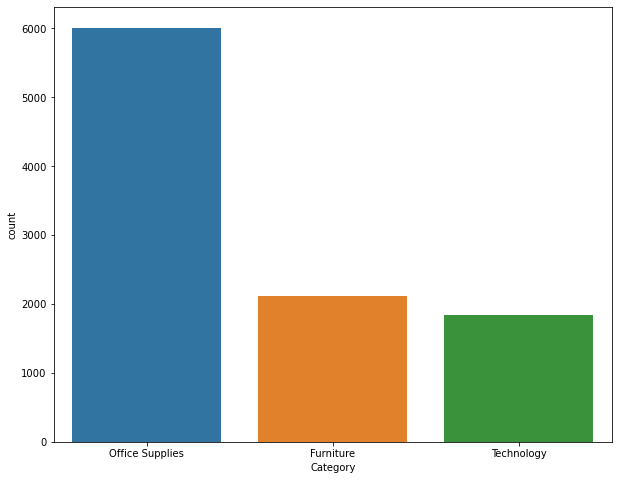

In [15]:
print(df['Category'].value_counts())
plt.figure(figsize=(10,8))
sns.countplot(x='Category',data=df,order=df['Category'].value_counts().index)

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64


<AxesSubplot:xlabel='Segment', ylabel='count'>

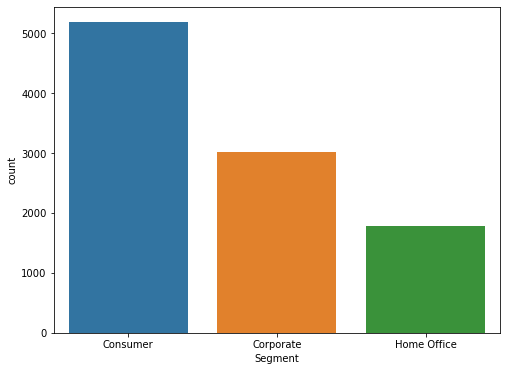

In [16]:
print(df['Segment'].value_counts())
plt.figure(figsize=(8,6))
sns.countplot(x='Segment',data=df)

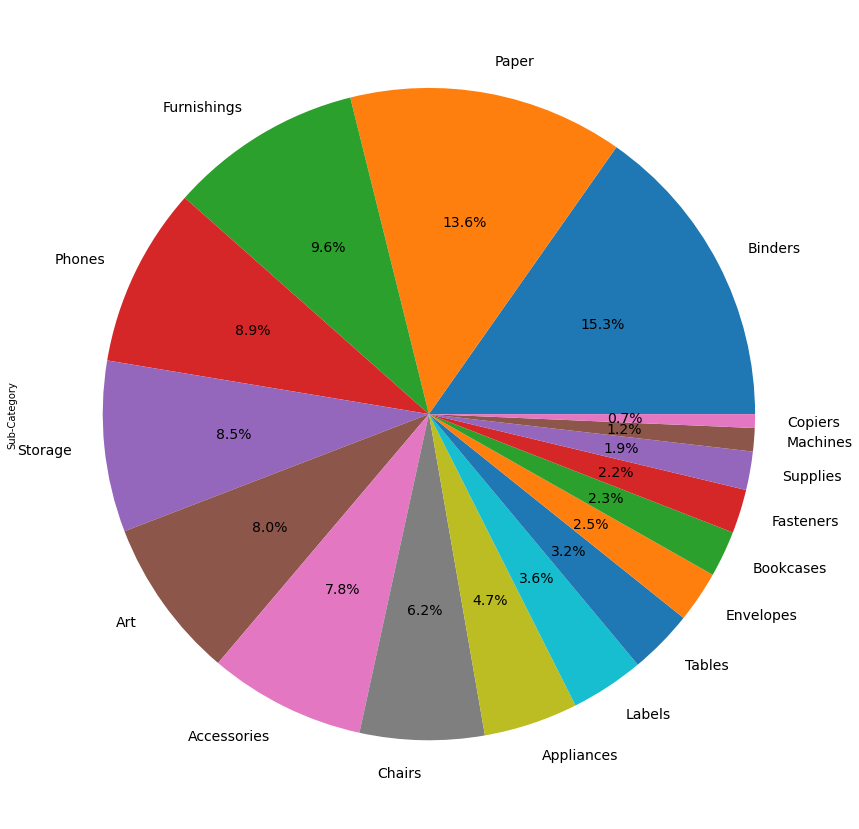

In [17]:
plt.figure(figsize=(18,15))
df['Sub-Category'].value_counts().plot.pie(autopct = '%1.1f%%',textprops={'fontsize': 14})
plt.show()

<BarContainer object of 10 artists>

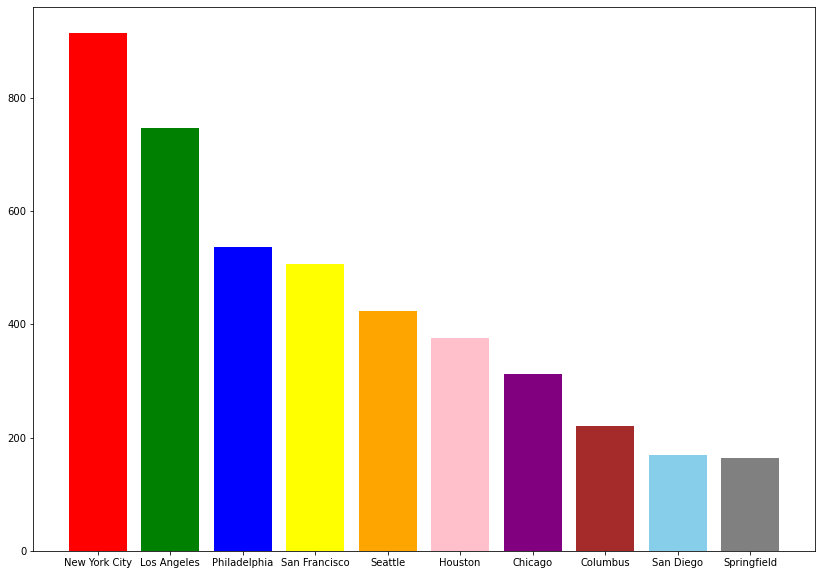

In [18]:
df['City'].value_counts()[0:10]
plt.figure(figsize=(14,10))
plt.bar(list(df['City'].value_counts()[0:10].keys()),list(df['City'].value_counts()[0:10]),color=['red','green','blue','yellow','orange','pink','purple','brown','skyblue','grey'])

<AxesSubplot:xlabel='Sales', ylabel='Count'>

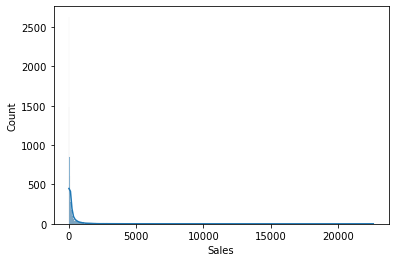

In [19]:
sns.histplot(x='Sales',data=df,kde=True)

In [20]:
print(df['Sales'].max())
print(df['Sales'].mean())
print(df['Sales'].min())
print(df['Sales'].median())

Q3 = np.percentile(df['Sales'],75)
Q1 = np.percentile(df['Sales'],25)

IQR = Q3-Q1

Upper = Q3 + (1.5 * IQR)
lower = Q1 - (1.5 * IQR)

df.drop(df[(df['Sales'] > Upper) | (df['Sales'] < lower)].index, inplace=True)
print(df['Sales'].max())
print(df['Sales'].mean())
print(df['Sales'].min())
print(df['Sales'].median())

22638.48
230.14890150345346
0.444
54.816
498.26
92.92994158910307
0.444
40.974999999999994


<AxesSubplot:xlabel='Sales', ylabel='Count'>

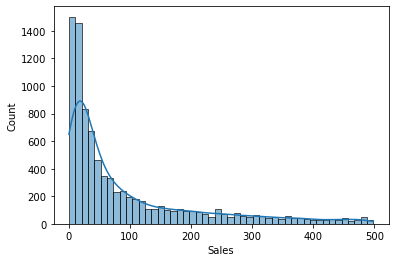

In [21]:
sns.histplot(x='Sales',data=df,kde=True)

<AxesSubplot:xlabel='Sales'>

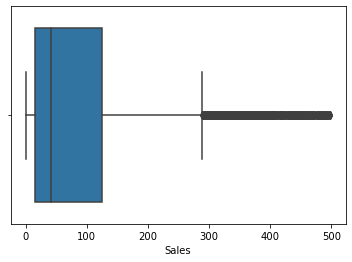

In [22]:
sns.boxplot(x='Sales',data=df)

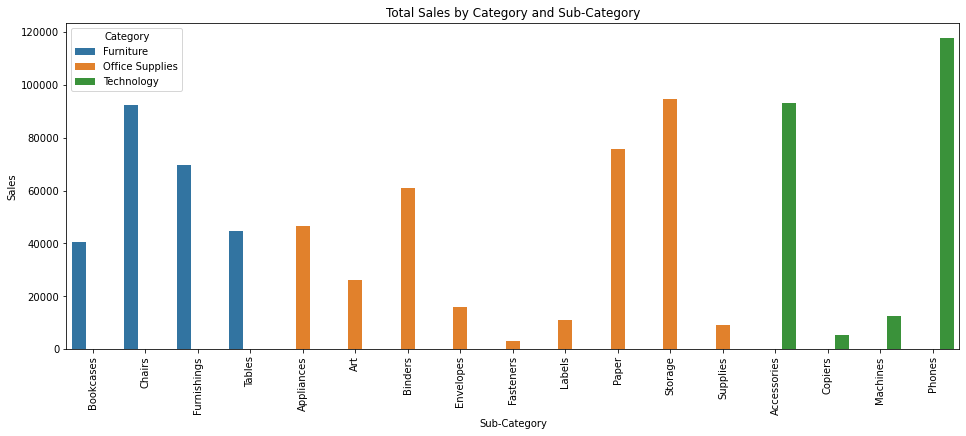

In [23]:
# Calculate total sales by category and sub-category
cat_sales = df.groupby(['Category','Sub-Category'])['Sales'].sum().reset_index()

# Plot the results
plt.figure(figsize=(16,6))
sns.barplot(x='Sub-Category', y='Sales', hue='Category', data=cat_sales)
plt.title('Total Sales by Category and Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()


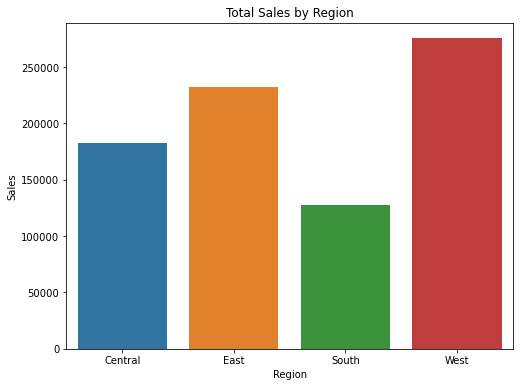

In [24]:
# Calculate total sales by region
reg_sales = df.groupby('Region')['Sales'].sum().reset_index()
# Plot the results
plt.figure(figsize=(8,6))
sns.barplot(x='Region', y='Sales', data=reg_sales)
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('Sales')
plt.show()

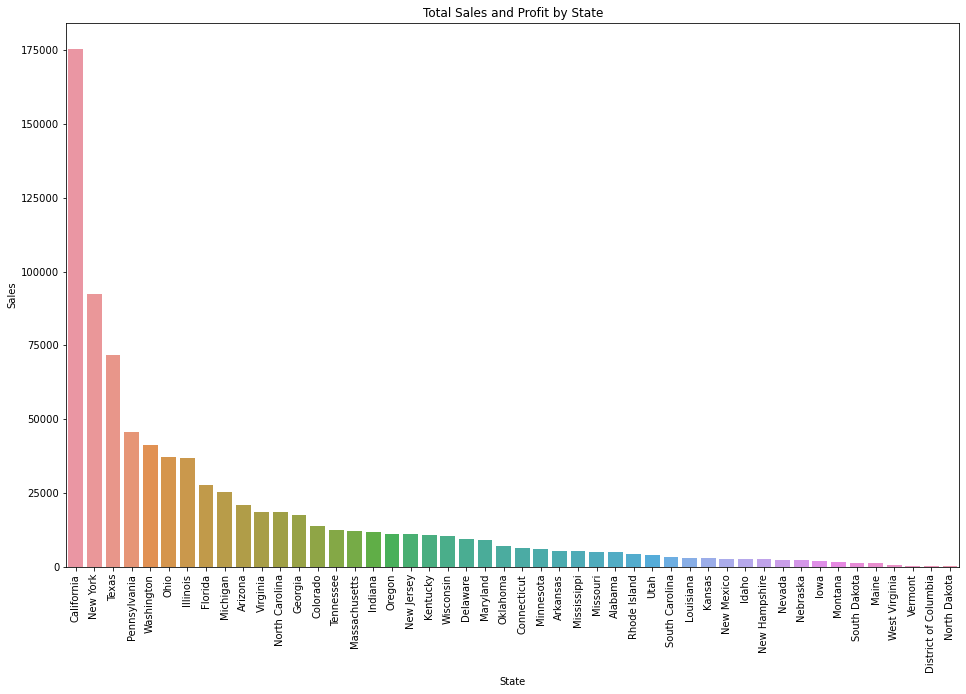

In [25]:
# Calculate total sales and profit by state
state_sales_profit = df.groupby('State')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)

# Plot the results
plt.figure(figsize=(16,10))
sns.barplot(x=state_sales_profit.index, y='Sales', data=state_sales_profit)
plt.title('Total Sales and Profit by State')
plt.xlabel('State')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()


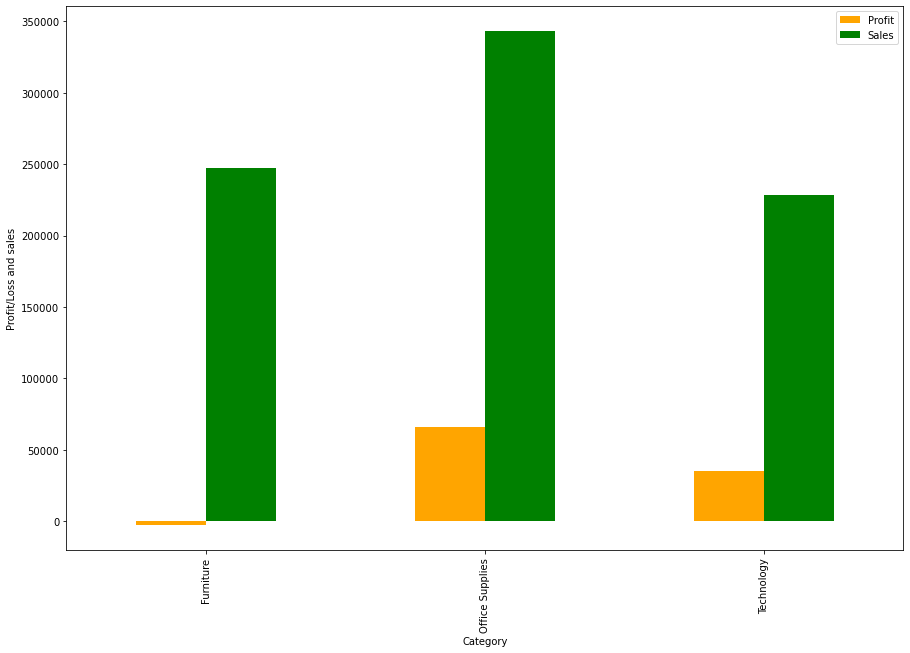

In [26]:
df.groupby('Category')[['Profit','Sales']].sum().plot.bar(figsize = (15, 10),color=['orange','green'])
plt.ylabel('Profit/Loss and sales')
plt.show()

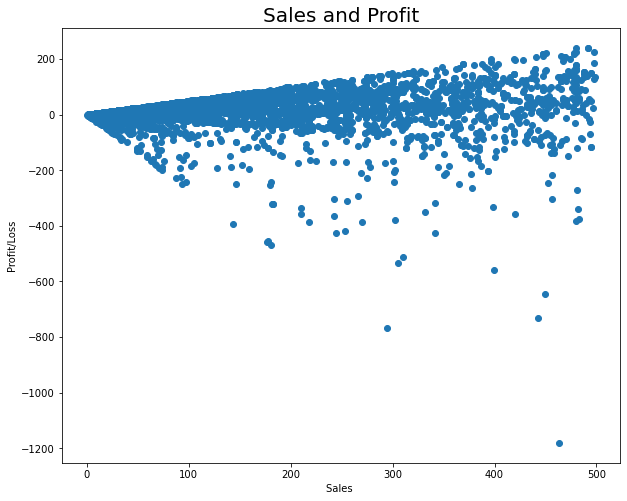

In [27]:
plt.figure(figsize=(10,8))
plt.scatter(df["Sales"] , df["Profit"])
plt.xlabel('Sales ')
plt.ylabel('Profit/Loss')
plt.title('Sales and Profit', fontsize = 20)
plt.show()


C:\Users\Abdul Rafe Khan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


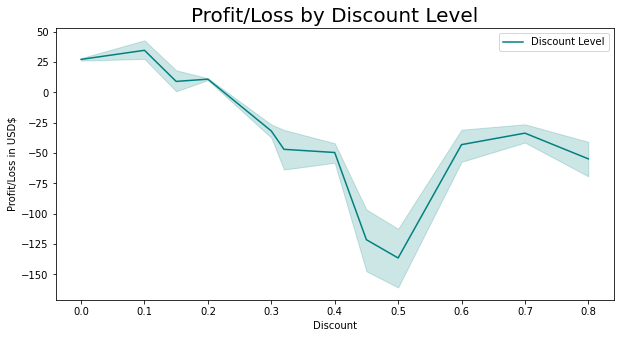

In [28]:
plt.figure(figsize = (10, 5))
# profit/loss by Discount level
sns.lineplot('Discount', 'Profit', data = df, color = 'Teal', label = 'Discount Level')
plt.ylabel('Profit/Loss in USD$')
plt.title('Profit/Loss by Discount Level', fontsize = 20)
plt.show()

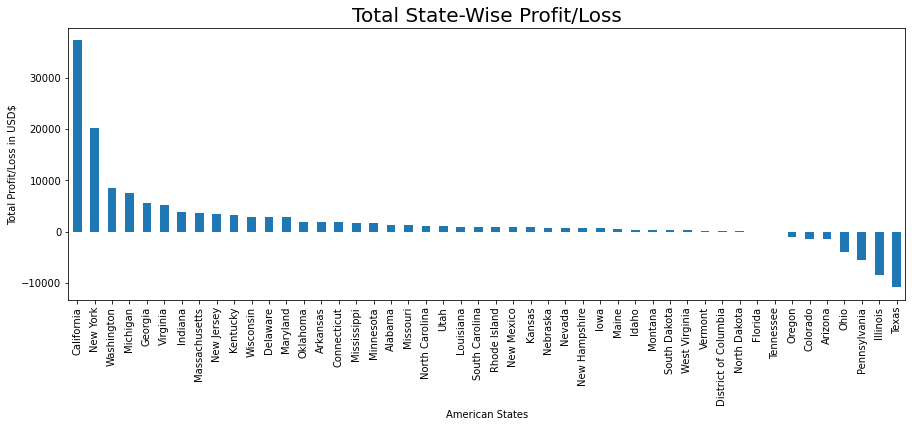

In [29]:
df_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).plot.bar(figsize = (15, 5))
plt.ylabel('Total Profit/Loss in USD$')
plt.xlabel('American States')
plt.title('Total State-Wise Profit/Loss', fontsize = 20)
plt.show()

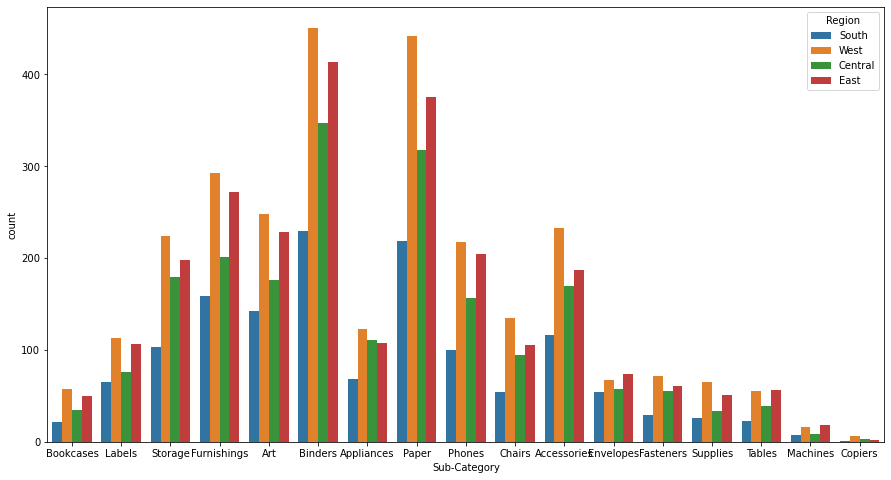

In [30]:
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

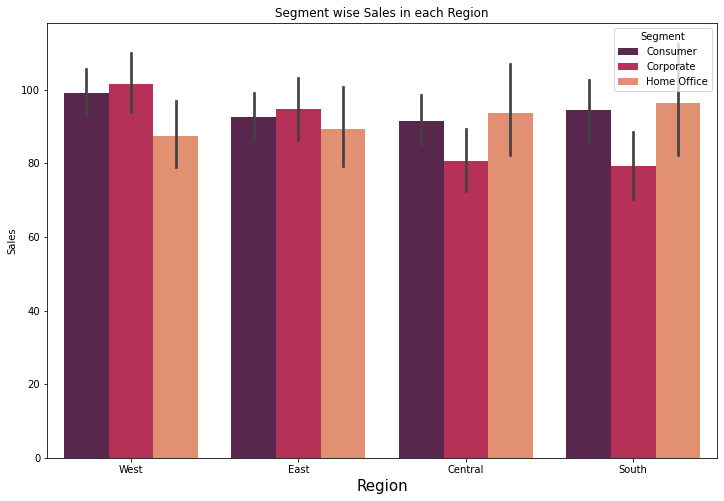

In [31]:
plt.figure(figsize=(12,8))
plt.title('Segment wise Sales in each Region')
sns.barplot(x='Region',y='Sales',data=df,hue='Segment',order=df['Region'].value_counts().index,palette='rocket')
plt.xlabel('Region',fontsize=15)
plt.show()

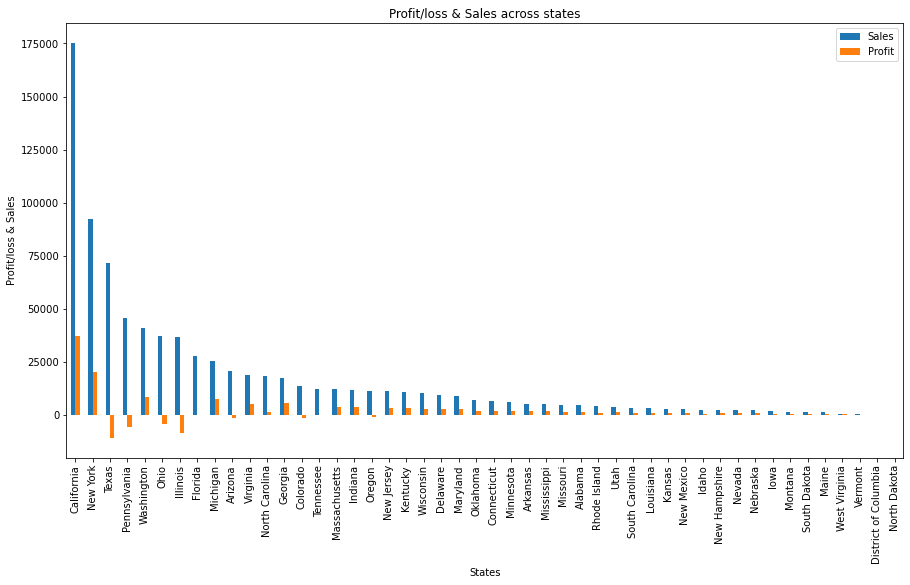

In [32]:
ps = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
ps[:].plot.bar(figsize=(15,8))
plt.title('Profit/loss & Sales across states')
plt.xlabel('States')
plt.ylabel('Profit/loss & Sales')
plt.show()

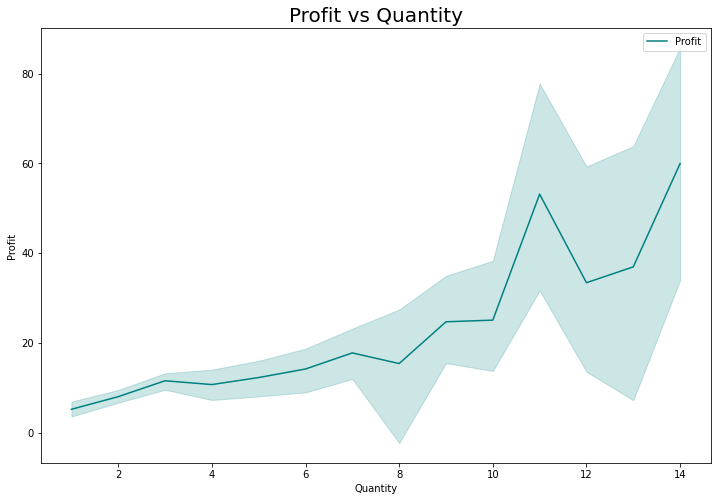

In [33]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Quantity',y='Profit',label='Profit',color='Teal',data=df)
plt.legend()
plt.title("Profit vs Quantity",fontsize=20)
plt.show()

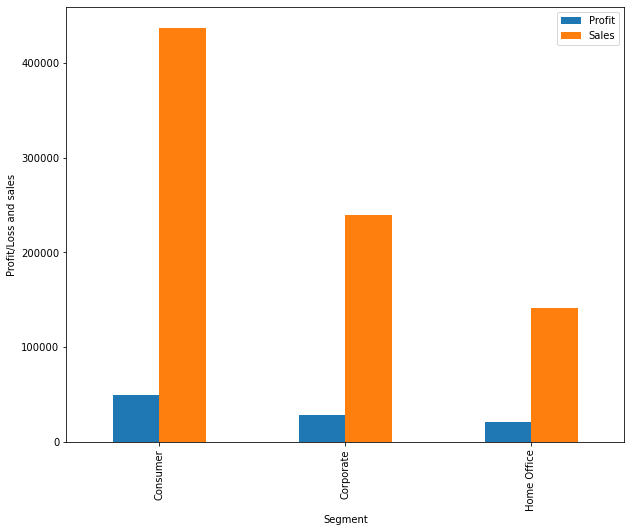

In [34]:
df.groupby('Segment')[['Profit','Sales']].sum().plot.bar(figsize=(10,8))
plt.ylabel('Profit/Loss and sales')
plt.show()

# Business Problems
Based on the above analysis, we can identify several business problems that need to be addressed to improve profitability.


1.The office supplies category has the lowest sales, and therefore, the company needs to come up with new strategies to increase sales in this category.

2.Some sub-categories like tables, bookcases, and supplies are generating negative profits. The company needs to investigate why this is happening and take corrective actions.

3.Some states like Texas, Pennsylvania, and Illinois are generating negative profits. The company needs to investigate why this is happening and take corrective actions.

4.The furniture category has the lowest profit compared to the office supplies and technology categories. The company needs to come up with strategies to increase profits in this category.

Thank You